<h1 style="color: #8b5e3c;">Bucks Dataset Data Visualization</h1>
In this Jupyter Notebook, we look at all the Bucks Datasets that we have as well as the new ones we've created. The aim is to create data visualizations that will help us with understanding the relationships between features and uncover any insights.

<h3 style="color: #8b5e3c"> Determining Features of Interest in AccountLevel </h3>
We start off by looking at the features in the AccountLevel dataset, and seeing what features might be important to us, and then determining if the relationships between those features would lead us to deriving an answer for the business question. We begin my importing the datasets.

In [1]:
# importing the pandas library and IPython display
import pandas as pd
from IPython.display import display

# importing the account data frame
account_df = pd.read_csv("C:/GitHub/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/AccountLevel.csv")

# viewing the data frame
display(account_df)

,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,2023,1,0,0,0,0,467.00,0,F,12.0,872.0,Low
1,2023,2,2,0,0,0,116.00,1,A,47.0,485.0,Low
2,2023,3,3,0,0,0,107.00,1,B,6.0,896.0,Low
3,2023,4,0,0,3,0,27.00,1,C,3.0,467.0,High
4,2023,5,0,0,2,0,14.00,1,A,4.0,582.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
44206,2024,43025,2,0,0,0,2.00,1,A,26.0,290.0,High
44207,2024,43026,0,0,3,0,6.34,1,D,6.0,266.0,Medium
44208,2024,43027,0,0,6,0,41.00,1,Limited Data,9.0,392.0,High
44209,2024,43028,2,0,0,0,68.00,1,A,6.0,898.0,High


In [2]:
# displaying the statistics and information of the dataset
display(account_df.info())
display((account_df.describe()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 44211 non-null  int64  
 1   AccountNumber          44211 non-null  int64  
 2   SingleGameTickets      44211 non-null  int64  
 3   PartialPlanTickets     44211 non-null  int64  
 4   GroupTickets           44211 non-null  int64  
 5   STM                    44211 non-null  int64  
 6   AvgSpend               44211 non-null  float64
 7   GamesAttended          44211 non-null  int64  
 8   FanSegment             44211 non-null  object 
 9   DistanceToArena        41088 non-null  float64
 10  BasketballPropensity   37214 non-null  float64
 11  SocialMediaEngagement  44211 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 4.0+ MB


None

,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,DistanceToArena,BasketballPropensity
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,41088.000000,37214.000000
mean,2023.645631,21116.251815,1.987582,0.836082,2.476669,0.049648,81.139832,1.262966,143.870668,689.229027
std,0.478327,12508.767388,15.080973,5.177241,178.657845,0.217220,94.742229,2.323687,329.215154,235.621148
min,2023.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000
25%,2023.000000,10169.500000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,8.000000,481.000000
50%,2024.000000,20923.000000,2.000000,0.000000,0.000000,0.000000,62.000000,1.000000,30.000000,719.000000
75%,2024.000000,31975.500000,3.000000,0.000000,0.000000,0.000000,100.000000,1.000000,87.000000,923.000000
max,2024.000000,43028.000000,3120.000000,120.000000,37200.000000,1.000000,3297.000000,41.000000,4240.000000,993.000000


<h2 style="color: #8b5e3c"> Average Spending vs Fan Segment (Violin Plot) </h2>
We would like to start our visualization by comparing the average spending against the fan segment. We would like to see the number of outliers. The reasoning is that we would like to know if we need to adjust the IQR for when we start plotting.

In [3]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# importing the seaborn
import seaborn as sns

# defining the quartiles
Q1 = account_df['AvgSpend'].quantile(0.25)
Q3 = account_df['AvgSpend'].quantile(0.75)
interquartile_range = Q3 - Q1

# defining the lower and upper bounds
lower_bound = Q1 - (1.5 * interquartile_range)
upper_bound = Q3 + (1.5 * interquartile_range)

In [4]:
# setting up a outlier count
outlier_counts = {}

# counting all the outlier data points 
for segment, group in account_df.groupby('FanSegment'):
    outlier_count = 0
    for value in group['AvgSpend']:
        if value < lower_bound or value > upper_bound:
            outlier_count = outlier_count + 1
    outlier_counts[segment] = round((outlier_count / len(group)) * 100, 2)

# printing out the number of outliers
print("Percentage of Outliers: ", outlier_counts)

Percentage of Outliers:  {'A': 4.31, 'B': 5.12, 'C': 5.53, 'D': 4.66, 'E': 8.44, 'F': 7.88, 'G': 25.08, 'Limited Data': 5.25}


<h3 style="color: #8b5e3c"> Function for the Violin Plot </h3>
Before we plot out the violin plots, we define a function that is designed to plot out a violin plot. This will help remove code is that too repetitive and will help reduce the size of the cells that are meant for graphing out box plots.

In [5]:
# importing the sns library
import seaborn as sns

# function for graphing out a violin plot
def graph_violin_plot(fan_segment, y_axis_title, dataset, ax):
    sns.violinplot(y = y_axis_title, data=dataset, color='#00471B', ax=ax)
    ax.set_title(f"Average Spending Violin Plot for Segment {fan_segment}")
    ax.set_xlabel(fan_segment)
    ax.set_ylabel(y_axis_title)

<h3 style="color: #8b5e3c"> Visualizing the Average Spending vs Fan Segment of Bucks Fans </h3>
Now that we made the function, we now make a box plot for looking at the average spending and fan segments of Bucks Fans. Since we're comparing a categorical variable against a numerical variable, we decided to opt for a box plot to visualize the results. Here is the visualization as such.

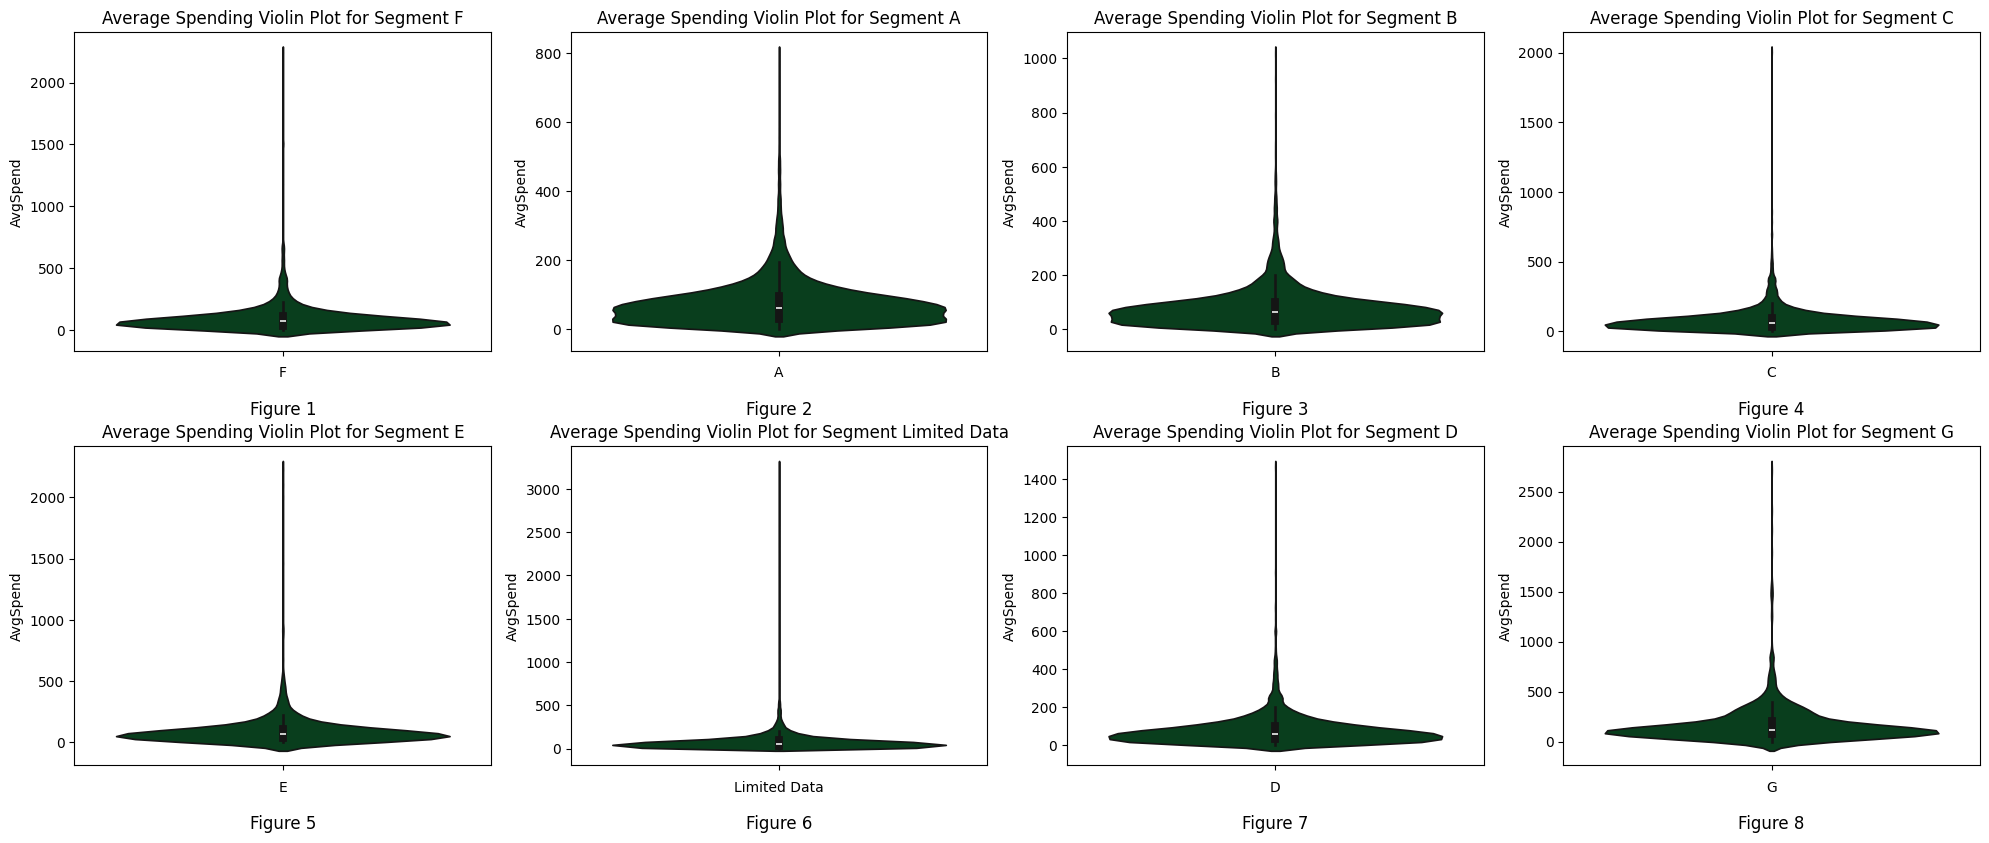

In [6]:
# finding unique value of the fan segments
fan_segments = account_df['FanSegment'].unique()

# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments):
    if i < len(axes):  
        segment_df = account_df[account_df['FanSegment'] == segment]
        graph_violin_plot(segment, "AvgSpend", segment_df, axes[i])
        axes[i].text(
            0.5,           
            -0.2,          
            f"Figure {i+1}",
            transform=axes[i].transAxes,
            ha='center',
            fontsize=12,    
            clip_on=False   
        )
    
for j in range(len(fan_segments), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the figure
fig.savefig("C:/GitHub/BucksHackathon25/BucksPlots/fan_segments_violin_plots.png", dpi=300, bbox_inches='tight')

# displaying the plot
plt.show()

<h2 style="color: #8b5e3c"> Distance To Arena vs Basketball Propensity (Scatter Plot) </h2>
Next, we compare the DistanceToArena feature, which is the distance of residence to Fiserv Forum in miles against BasketballPropensity, which is the numerical value that represents basketball interest. It works from a scale of 0 to 1,000.

In [7]:
# checking for unexpected outliers in basketball propensity
max_propensity = account_df['BasketballPropensity'].dropna().unique().max()
print("Maximum Basketball Propensity: ", max_propensity)

# counting the number of null values in basketball propensity
na_propensity_count = account_df['BasketballPropensity'].isnull().sum()
print("Number of Null Values: ", na_propensity_count)

# counting the number of null values in distance to arena
na_distance_area_count = account_df['DistanceToArena'].isnull().sum()
print("Number of Null Values in Distance to Area: ", na_distance_area_count)

Maximum Basketball Propensity:  993.0
Number of Null Values:  6997
Number of Null Values in Distance to Area:  3123


<h3 style="color: #8b5e3c"> Function for the Scatter Plot </h3>
Before we plot out the scatter plots, we define a function that is designed to plot out a scatter plot. This will help remove code is that too repetitive and will help reduce the size of the cells that are meant for graphing out scatter plot.

In [8]:
# importing the numpy library
import numpy as np

# function for graphing out a scatter plot
def graph_scatter_plot(data_frame, x_label, y_label):

    data_frame['color_flag'] = 'Other'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 0 to 200'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 800 to 1000'

    sns.scatterplot(data=account_df, x=x_label, y=y_label,  hue='color_flag',  
            palette={'Milwaukee County 0 to 200': '#4D7C5A', 
                    'Milwaukee County 400 to 800' : '#195C35',
                    'Milwaukee County 800 to 1000' : '#2E8B57',
                    'Midwest 0 to 400':'#C19A6B',
                    'Midwest 400 to 800':'#8B5E3C',
                    'Midwest 800 to 1000':'#5F3C23',
                    'US-Canada 0 to 400':'#A7D3F4',
                    'US-Canada 400 to 800':'#3399CC',
                    'US-Canada 800 to 1000':'#0077C0',
                    'International 0 to 400':'#FBF6ED',
                    'International 400 to 800':'#F5EBD9',
                    'International 800 to 1000':'#EEE1C6',
                    'Other' : '#d3d3d3'
        }
    )
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yticks(np.arange(0, 5000, 500))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(f"{x_label} vs {y_label} Scatterplot")

    # saving the figure
    plt.savefig(f"C:/GitHub/BucksHackathon25/BucksPlots/propensity_vs_distance_scatterplot.png", dpi=300, bbox_inches='tight')

<h3 style="color: #8b5e3c"> Plotting out the Scatter Plot </h3>
It is worth noting that there are missing values in both features. I will attempt to plot out a scatter plot, which by default should ingore the missing values. It is worth noting that later on, I will attempt at imputing the missing values and then plot out a new scatter plot. Another thing worth noting is that since we divided basketball propensity and DistanceToArena into categories, we can then plot out a heat map.

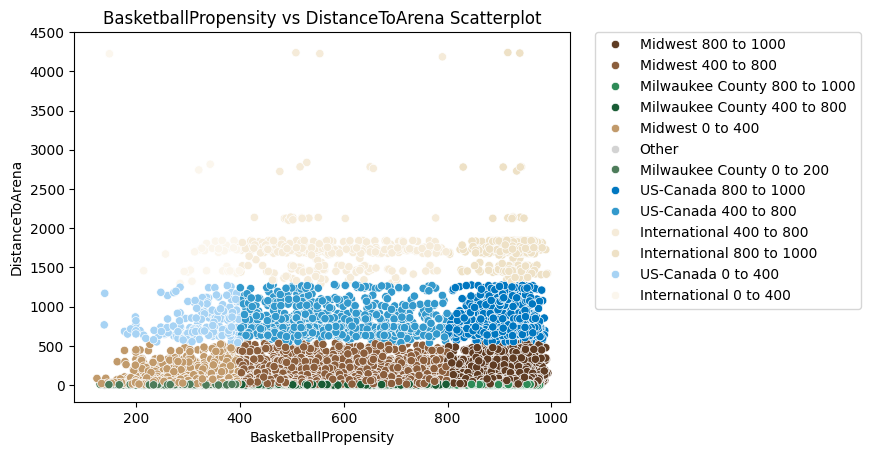

In [9]:
graph_scatter_plot(account_df, 'BasketballPropensity', 'DistanceToArena')

<h2 style="color: #8b5e3c"> Distance To Arena vs Basketball Propensity (Box Plot) </h2>
To allow us to derive a better understanding of the relationship between Distance To Arena and Basketball Propensity, I will categorize the levels of interest in Milwaukee Bucks games by Fans as 'Low', 'Medium' and 'High', which is from 0 to 400, 400 to 800 and 800 to 1000. For basketball propensity, I will categorize according to distance from Fiserv Forum, as shown in the legend below.

In [10]:
# creating a new copy of the data frame
account_df_copy = account_df.copy()

# categorizing the basketball propensity feature into three different categories
for propensity_score in account_df_copy.index:
    score = account_df_copy.at[propensity_score, 'BasketballPropensity']
    if(0 <= score < 400):
        account_df_copy.at[propensity_score, 'BasketballPropensity'] = 'Low'
    elif(400 <= score < 800):
        account_df_copy.at[propensity_score, 'BasketballPropensity'] = 'Medium'
    elif(score >=  800):
        account_df_copy.at[propensity_score, 'BasketballPropensity'] = 'High'

# categorizing the distance to arena feature into different categories
for arena_distance in account_df_copy.index:
    distance = account_df_copy.at[arena_distance, 'DistanceToArena']
    if(0 <= distance < 12):
        account_df_copy.at[arena_distance, 'DistanceToArena'] = 'Milwaukee'
    if(12 <= distance < 540):
        account_df_copy.at[arena_distance, 'DistanceToArena'] = 'Midwest'
    if(540 <= distance < 1288):
        account_df_copy.at[arena_distance, 'DistanceToArena'] = 'US-Canada'
    if(1288 <= distance < 4500):
        account_df_copy.at[arena_distance, 'DistanceToArena'] = 'International'

# viewing the copy of the data frame
account_df_copy.head(3)

C:\Users\chowdhuryj\AppData\Local\Temp\ipykernel_9356\1169480436.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy.at[propensity_score, 'BasketballPropensity'] = 'High'
C:\Users\chowdhuryj\AppData\Local\Temp\ipykernel_9356\1169480436.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Midwest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy.at[arena_distance, 'DistanceToArena'] = 'Midwest'


,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,color_flag
0,2023,1,0,0,0,0,467.0,0,F,Midwest,High,Low,Midwest 800 to 1000
1,2023,2,2,0,0,0,116.0,1,A,Midwest,Medium,Low,Midwest 400 to 800
2,2023,3,3,0,0,0,107.0,1,B,Milwaukee,High,Low,Milwaukee County 800 to 1000


<h3 style="color: #8b5e3c"> Plotting Out a Heatmap </h3>
Now, we will plot a heat map, as we have converted the the two features into categorical features. Since we're plotting two categorical features against each other, it is worth plotting a heatmap, and we hope creating this heat map will help uncover more insights into our data.
 

In [20]:
# dropping all missing values
filtered_df = account_df_copy.dropna(subset=['DistanceToArena', 'BasketballPropensity'])

# finding all the unique values in DistanceToArena
print("Unique Values of DistanceToArena", filtered_df['DistanceToArena'].unique())

# finding all the unique values in BasketBallPropensity
print("Unique Values of BasketBallPropensity", filtered_df['BasketballPropensity'].unique())

print("\n")

# finding count of unique values in DistanceToArena
distance_count = filtered_df['DistanceToArena'].value_counts()
print(distance_count)

print("\n")

# finding count of unique values in BasketBallPropensity
propensity_count = filtered_df['BasketballPropensity'].value_counts()
print(propensity_count)

Unique Values of DistanceToArena ['Midwest' 'Milwaukee' 'US-Canada' 'International']
Unique Values of BasketBallPropensity ['High' 'Medium' 'Low']


DistanceToArena
Midwest          22312
Milwaukee        11552
US-Canada         2067
International      865
Name: count, dtype: int64


BasketballPropensity
High      16763
Medium    14620
Low        5413
Name: count, dtype: int64


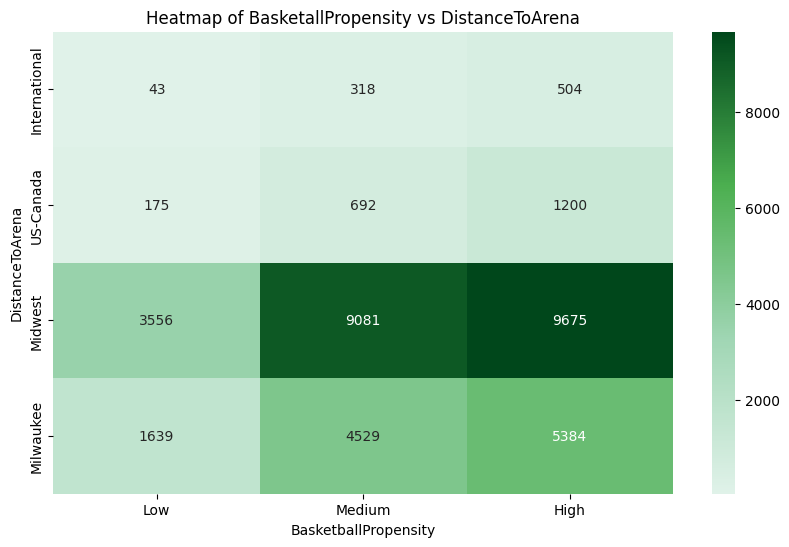

In [32]:
# importing the color map library
from matplotlib.colors import LinearSegmentedColormap

# order of axes
x_order = ['Low', 'Medium', 'High']
y_order = ['Milwaukee', 'Midwest', 'US-Canada', 'International'][::-1]

# producing a frequency table
heatmap = pd.crosstab(filtered_df['DistanceToArena'], filtered_df['BasketballPropensity'])
heatmap = heatmap.reindex(index=y_order, columns=x_order)

# defining a color map scheme
bucks_cmap = LinearSegmentedColormap.from_list("bucks_green",  ["#E0F2E9", "#A0D6B4", "#4CAF50", "#00471B"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bucks_cmap)
plt.title("Heatmap of BasketallPropensity vs DistanceToArena")

 # saving the figure
plt.savefig(f"C:/GitHub/BucksHackathon25/BucksPlots/propensity_vs_distance_heatmap.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> SocialMediaEngagement vs BasketballPropensity (Box Plot) </h2>
Next up, we now compare the SocialMediaEngagement of Fans against the BasketballPropensity. As Basketball propensity is a numerical feature, I would like to focus on making box plots at first to see what kind of relationships can be dervied from the data visualization.

In [46]:
# dropping all missing values
filtered_df_two = account_df.dropna(subset=['SocialMediaEngagement', 'BasketballPropensity'])
filtered_df_two.head(3)

,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,color_flag
0,2023,1,0,0,0,0,467.0,0,F,12.0,872.0,Low,Midwest 800 to 1000
1,2023,2,2,0,0,0,116.0,1,A,47.0,485.0,Low,Midwest 400 to 800
2,2023,3,3,0,0,0,107.0,1,B,6.0,896.0,Low,Milwaukee County 800 to 1000


<h3 style="color: #8b5e3c"> Function for Boxplot </h3>
Now, we define a function for the box plot. We use this function to allow us to create box plots as this eliminates the need to use the same code multiple times.

In [54]:
# function to produce a box plot
def create_box_plot(dataframe, x, y, title, filename):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=dataframe, x=x, y=y)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"C:/GitHub/BucksHackathon25/BucksPlots/{filename}.png", dpi=300, 
            bbox_inches='tight')
    plt.show()
    

<h3 style="color: #8b5e3c"> Plotting out the Boxplots </h3>
Given that we've defined the function for producing box plots, we now move to create a box plot that helps to determine the relationship between basketball propensity and social media engagement.

Median of Low Social Media Engagement:  727.0
Median of Medium Social Media Engagement:  718.0
Median of High Social Media Engagement:  711.0


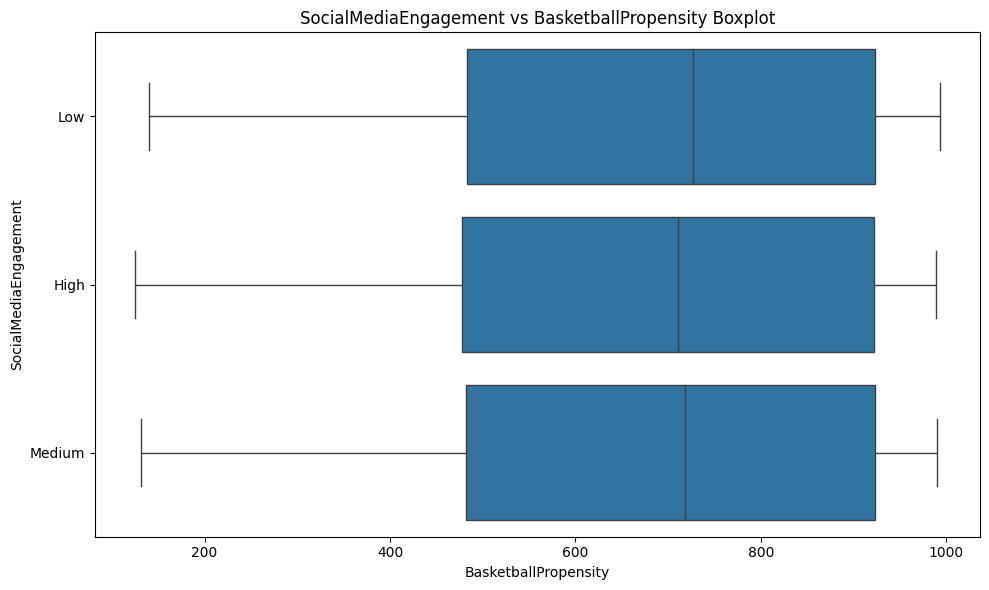

In [55]:
# calculating the median values of low social media category
subset_low = filtered_df_two[
    (filtered_df_two['SocialMediaEngagement'] == 'Low')
]
print("Median of Low Social Media Engagement: " , subset_low['BasketballPropensity'].median())

# calculating the median values of medium social media category
subset_median = filtered_df_two[
    (filtered_df_two['SocialMediaEngagement'] == 'Medium')
]
print("Median of Medium Social Media Engagement: " , subset_median['BasketballPropensity'].median())

# calculating the median values of high social media category
subset_high = filtered_df_two[
    (filtered_df_two['SocialMediaEngagement'] == 'High')
]
print("Median of High Social Media Engagement: " , subset_high['BasketballPropensity'].median())

# plotting out the box plot
create_box_plot(filtered_df_two, 'BasketballPropensity', 'SocialMediaEngagement',
                "SocialMediaEngagement vs BasketballPropensity Boxplot", 'sme_vs_propensity_boxplot.png')